In [3]:
import pandas as pd
import numpy as np
import glob
import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [5]:
metadata = pd.read_csv("musicnet_metadata.csv")

In [7]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            330 non-null    int64 
 1   composer      330 non-null    object
 2   composition   330 non-null    object
 3   movement      330 non-null    object
 4   ensemble      330 non-null    object
 5   source        330 non-null    object
 6   transcriber   330 non-null    object
 7   catalog_name  330 non-null    object
 8   seconds       330 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 23.3+ KB


In [9]:
mozart_metadata = metadata[metadata['composer']=='Mozart']

In [11]:
mozart_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 30 to 53
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            24 non-null     int64 
 1   composer      24 non-null     object
 2   composition   24 non-null     object
 3   movement      24 non-null     object
 4   ensemble      24 non-null     object
 5   source        24 non-null     object
 6   transcriber   24 non-null     object
 7   catalog_name  24 non-null     object
 8   seconds       24 non-null     int64 
dtypes: int64(2), object(7)
memory usage: 1.9+ KB


In [13]:
path = '/Users/paarthgoyal/Desktop/Mozart Only Final/Mozart Only/Mozart_CSV_Files'
all_files = glob.glob(path + "/*.csv")
li = []

for filename in all_files:
    df = pd.read_csv(filename)
    df['id'] = os.path.basename(filename[:-4])
    li.append(df)
mozart_song_data = pd.concat(li, axis=0, ignore_index=True)
mozart_song_data['id'] = mozart_song_data['id'].astype(str).astype(int)

In [16]:
mozart_song_data.head()

,start_time,end_time,instrument,note,start_beat,end_beat,note_value,id
0,14302,26589,43,48,0.0,0.2,Triplet Sixteenth,1788
1,52702,64478,43,48,0.5,0.2,Triplet Sixteenth,1788
2,86494,101854,43,48,1.0,0.2,Triplet Sixteenth,1788
3,119774,132574,43,48,1.5,0.2,Triplet Sixteenth,1788
4,161758,176094,43,48,2.0,0.2,Triplet Sixteenth,1788


In [18]:
song_1788 = mozart_song_data[mozart_song_data['id'] == 1788]
song_1788_original_notes = song_1788['note']
song_1788 = song_1788.drop(columns = 'note')

In [20]:
song_1788.head()

,start_time,end_time,instrument,start_beat,end_beat,note_value,id
0,14302,26589,43,0.0,0.2,Triplet Sixteenth,1788
1,52702,64478,43,0.5,0.2,Triplet Sixteenth,1788
2,86494,101854,43,1.0,0.2,Triplet Sixteenth,1788
3,119774,132574,43,1.5,0.2,Triplet Sixteenth,1788
4,161758,176094,43,2.0,0.2,Triplet Sixteenth,1788


In [22]:
mozart_df = metadata.merge(mozart_song_data, on = 'id')
mozart_df = mozart_df.drop(['source', 'transcriber', 'catalog_name','composer'], axis=1)

In [24]:
mozart_df.head()

,id,composition,movement,ensemble,seconds,start_time,end_time,instrument,note,start_beat,end_beat,note_value
0,1788,String Quartet No 19 in C major,1. Adagio - Allegro,String Quartet,513,14302,26589,43,48,0.0,0.2,Triplet Sixteenth
1,1788,String Quartet No 19 in C major,1. Adagio - Allegro,String Quartet,513,52702,64478,43,48,0.5,0.2,Triplet Sixteenth
2,1788,String Quartet No 19 in C major,1. Adagio - Allegro,String Quartet,513,86494,101854,43,48,1.0,0.2,Triplet Sixteenth
3,1788,String Quartet No 19 in C major,1. Adagio - Allegro,String Quartet,513,119774,132574,43,48,1.5,0.2,Triplet Sixteenth
4,1788,String Quartet No 19 in C major,1. Adagio - Allegro,String Quartet,513,161758,176094,43,48,2.0,0.2,Triplet Sixteenth


In [26]:
mozart_df_encoded = pd.get_dummies(mozart_df, columns=['composition', 'movement', 'ensemble', 'note_value'])
for col in mozart_df_encoded.select_dtypes(include=['bool']).columns:
    mozart_df_encoded[col] = mozart_df_encoded[col].astype(int)

In [28]:
mozart_df_encoded.head()

,id,seconds,start_time,end_time,instrument,note,start_beat,end_beat,composition_Clarinet Quintet in A major,composition_Piano Trio No 3 in B-flat major,...,note_value_Sixty Fourth,note_value_Thirty Second,note_value_Tied Quarter-Sixteenth,note_value_Tied Quarter-Thirty Second,note_value_Triplet,note_value_Triplet Sixteenth,note_value_Triplet Sixty Fourth,note_value_Triplet Thirty Second,note_value_Unknown,note_value_Whole
0,1788,513,14302,26589,43,48,0.0,0.2,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1788,513,52702,64478,43,48,0.5,0.2,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1788,513,86494,101854,43,48,1.0,0.2,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1788,513,119774,132574,43,48,1.5,0.2,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1788,513,161758,176094,43,48,2.0,0.2,0,0,...,0,0,0,0,0,1,0,0,0,0


In [30]:
# to_predict will be fed into the model and the predictions for notes for each instance will be the generated song
to_predict = mozart_df_encoded[mozart_df_encoded['id'] == 1788]
to_predict = to_predict.drop(columns = 'note')

In [32]:
to_predict.head()

,id,seconds,start_time,end_time,instrument,start_beat,end_beat,composition_Clarinet Quintet in A major,composition_Piano Trio No 3 in B-flat major,composition_Piano Trio No 4 in E major,...,note_value_Sixty Fourth,note_value_Thirty Second,note_value_Tied Quarter-Sixteenth,note_value_Tied Quarter-Thirty Second,note_value_Triplet,note_value_Triplet Sixteenth,note_value_Triplet Sixty Fourth,note_value_Triplet Thirty Second,note_value_Unknown,note_value_Whole
0,1788,513,14302,26589,43,0.0,0.2,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1788,513,52702,64478,43,0.5,0.2,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1788,513,86494,101854,43,1.0,0.2,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1788,513,119774,132574,43,1.5,0.2,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1788,513,161758,176094,43,2.0,0.2,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [34]:
# removing all instances of the song with id 1788 from the data as we have to make final predictions on it
mozart_df_encoded = mozart_df_encoded[mozart_df_encoded['id'] != 1788]

In [18]:
mozart_df_encoded_y = mozart_df_encoded['note']
mozart_df_encoded_X = mozart_df_encoded.drop(columns='note')

In [19]:
mozart_df_encoded_X_train, mozart_df_encoded_X_test, mozart_df_encoded_y_train, mozart_df_encoded_y_test = train_test_split(mozart_df_encoded_X, mozart_df_encoded_y, test_size=0.2, random_state=42)
# splitting the data into training and test sets

In [20]:
LR_model = LinearRegression()
LR_model.fit(mozart_df_encoded_X_train, mozart_df_encoded_y_train)

LinearRegression()

In [21]:
y_pred_test = LR_model.predict(mozart_df_encoded_X_test)

In [22]:
mse = mean_squared_error(mozart_df_encoded_y_test, y_pred_test)
mae = mean_absolute_error(mozart_df_encoded_y_test, y_pred_test)
rmse = mse**0.5
r2 = r2_score(mozart_df_encoded_y_test, y_pred_test)
accuracy = accuracy_score(mozart_df_encoded_y_test, y_pred_test.astype(int))
precision = precision_score(mozart_df_encoded_y_test, y_pred_test.astype(int), average='weighted') 
recall = recall_score(mozart_df_encoded_y_test, y_pred_test.astype(int), average='weighted')
f1 = f1_score(mozart_df_encoded_y_test, y_pred_test.astype(int), average='weighted') 
macro_f1 = f1_score(mozart_df_encoded_y_test, y_pred_test.astype(int), average='macro')
print("Error metrics for Linear Regression model")
print("Mean squared error : ", mse)
print("Mean absolute error : ", mae)
print("Root mean square error : ", rmse)
print("R squared : ", r2)
print("Accuracy : ", accuracy)
print("Precision : ",precision)
print("Recall : ",recall)
print("F1 : ",f1)
print("Macro_F1 : ",macro_f1)

Error metrics for Linear Regression model
Mean squared error :  102.53058343933205
Mean absolute error :  8.15280586784851
Root mean square error :  10.125738661417845
R squared :  0.07814430228501668
Accuracy :  0.03397866455946266
Precision :  0.03203140384138762
Recall :  0.03397866455946266
F1 :  0.02019922831711915
Macro_F1 :  0.008872904152976965


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [23]:
# making predictions for the already set aside song
y_pred = LR_model.predict(to_predict)

In [24]:
y_pred

array([65.70047081, 65.70435611, 65.66001079, ..., 64.02023859,
       64.01942033, 64.01860207])

In [25]:
song_1788['note'] = y_pred.astype(int)
song_1788 = song_1788.drop(columns = ['id'])
original_order = ['start_time','end_time','instrument','note','start_beat','end_beat','note_value']
song_1788 = song_1788[original_order]

In [26]:
song_1788.head()

,start_time,end_time,instrument,note,start_beat,end_beat,note_value
0,14302,26589,43,65,0.0,0.2,Triplet Sixteenth
1,52702,64478,43,65,0.5,0.2,Triplet Sixteenth
2,86494,101854,43,65,1.0,0.2,Triplet Sixteenth
3,119774,132574,43,65,1.5,0.2,Triplet Sixteenth
4,161758,176094,43,65,2.0,0.2,Triplet Sixteenth


In [27]:
song_1788.to_csv('1788_LRgenerated.csv', index=False)

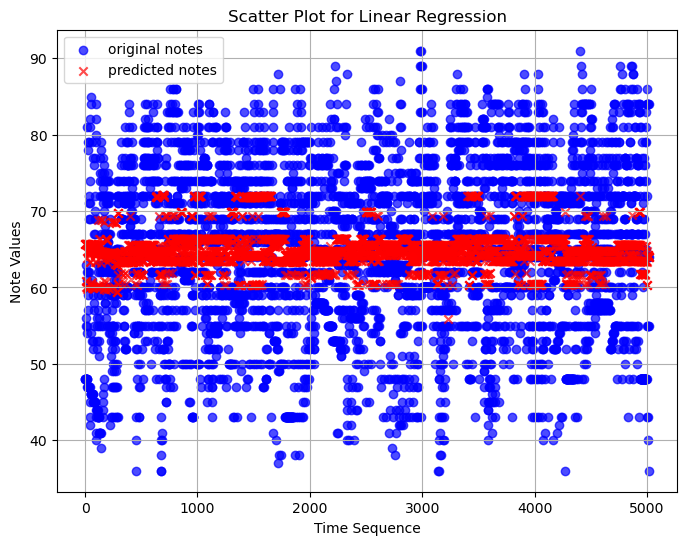

In [28]:
# X-axis values (1 to length of the arrays)
x_values = np.arange(1, len(song_1788_original_notes) + 1)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_values, song_1788_original_notes, color='blue', label='original notes', alpha=0.7, marker='o')
plt.scatter(x_values, y_pred, color='red', label='predicted notes', alpha=0.7, marker='x')

# Adding labels, legend, and grid
plt.xlabel('Time Sequence')
plt.ylabel('Note Values')
plt.title('Scatter Plot for Linear Regression')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()